In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
#import category_encoders as ce
from scipy import stats
from numpy import mean, std
import lightgbm as lgb
import seaborn as sns
#from catboost import CatBoostRegressor
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import seaborn as sns

SEED = 42

In [ ]:
#!pip install --upgrade plotly
#!pip install pmdarima
print("Done")

Done


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")
check = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")

In [ ]:
dataset_UK = df[df["location"] == "United Kingdom"]  

In [ ]:
dataset_UK.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
features = ["icu_patients", "date", "new_cases", "population", "new_tests", "new_deaths", "positive_rate"]

In [ ]:
dataset_UK = dataset_UK[features]

In [ ]:
dataset_UK["Mortality_Rate"] = dataset_UK["new_deaths"]/dataset_UK["population"]

In [ ]:
dataset_UK.head()

,icu_patients,date,new_cases,population,new_tests,new_deaths,positive_rate,Mortality_Rate
96578,NaN,2020-01-31,2.0,67886004.0,NaN,NaN,NaN,NaN
96579,NaN,2020-02-01,0.0,67886004.0,NaN,NaN,NaN,NaN
96580,NaN,2020-02-02,0.0,67886004.0,NaN,NaN,NaN,NaN
96581,NaN,2020-02-03,6.0,67886004.0,NaN,NaN,NaN,NaN
96582,NaN,2020-02-04,0.0,67886004.0,NaN,NaN,NaN,NaN


In [ ]:
dataset_UK.drop(["new_deaths", "population"], axis = 1, inplace = True)

In [ ]:
dataset_UK.tail()

,icu_patients,date,new_cases,new_tests,positive_rate,Mortality_Rate
97104,448.0,2021-07-10,31835.0,733853.0,0.027,5.008396e-07
97105,454.0,2021-07-11,31382.0,1118189.0,0.028,3.829950e-07
97106,482.0,2021-07-12,34810.0,NaN,NaN,8.838346e-08
97107,522.0,2021-07-13,36500.0,NaN,NaN,7.365288e-07
97108,NaN,2021-07-14,42183.0,NaN,NaN,7.365288e-07


In [ ]:
dataset_UK.set_index("date", inplace  = True)

In [ ]:
dataset_UK

,icu_patients,new_cases,new_tests,positive_rate,Mortality_Rate
date,,,,,
2020-01-31,NaN,2.0,NaN,NaN,NaN
2020-02-01,NaN,0.0,NaN,NaN,NaN
2020-02-02,NaN,0.0,NaN,NaN,NaN
2020-02-03,NaN,6.0,NaN,NaN,NaN
2020-02-04,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...
2021-07-10,448.0,31835.0,733853.0,0.027,5.008396e-07
2021-07-11,454.0,31382.0,1118189.0,0.028,3.829950e-07
2021-07-12,482.0,34810.0,NaN,NaN,8.838346e-08


In [ ]:
dataset_UK = dataset_UK[dataset_UK.index >= "2020-05-01"]

In [ ]:
dataset_UK.isna().sum()

icu_patients      1
new_cases         0
new_tests         3
positive_rate     3
Mortality_Rate    0
dtype: int64

In [ ]:
dataset_UK = dataset_UK[dataset_UK.index < "2021-07-12"]

In [ ]:
dataset_UK.columns

Index(['icu_patients', 'new_cases', 'new_tests', 'positive_rate',
       'Mortality_Rate'],
      dtype='object')

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : -4.3134006835865435e-05
The Mean absolute error is : 0.8094555207009563
The Mean squared error score is : 1.000043134006836
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



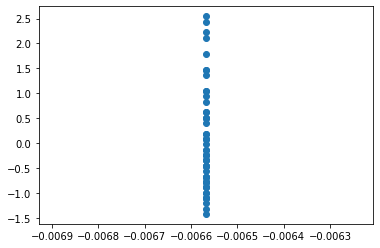

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["icu_patients", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
             # ("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    #final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : 2.220446049250313e-16
The Mean absolute error is : 0.810722961639796
The Mean squared error score is : 1.0
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



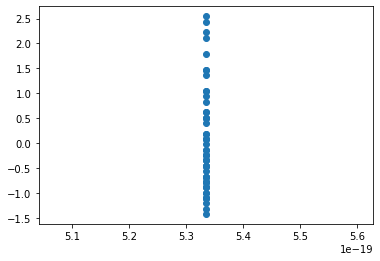

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["new_cases", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
              #("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 5))

]

reg = StackingRegressor(
    estimators = estimators ,
   # final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : 2.220446049250313e-16
The Mean absolute error is : 0.810722961639796
The Mean squared error score is : 1.0
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



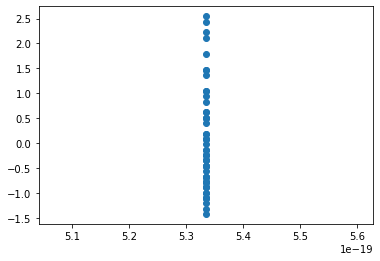

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["new_tests", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
              #("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    #final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : 2.220446049250313e-16
The Mean absolute error is : 0.810722961639796
The Mean squared error score is : 1.0
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



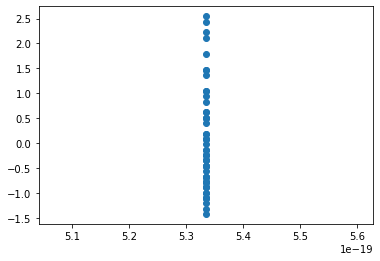

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["positive_rate", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
              #("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    #final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : 0.2297067458231532
The Mean absolute error is : 0.6544789033102955
The Mean squared error score is : 0.770293254176847
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



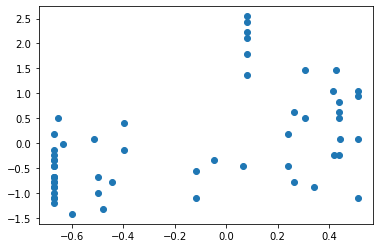

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["icu_patients", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
             ("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : -0.3444960817097531
The Mean absolute error is : 0.9837092651908782
The Mean squared error score is : 1.3444960817097535
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



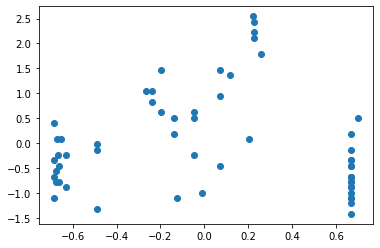

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["new_cases", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
             ("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : -0.1305706244537319
The Mean absolute error is : 0.8105075500239555
The Mean squared error score is : 1.1305706244537324
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



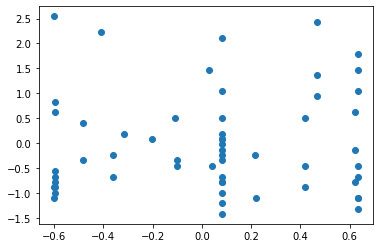

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["new_tests", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
             ("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
The r2 score is : 0.31601426945037703
The Mean absolute error is : 0.6117917985209695
The Mean squared error score is : 0.6839857305496232
------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



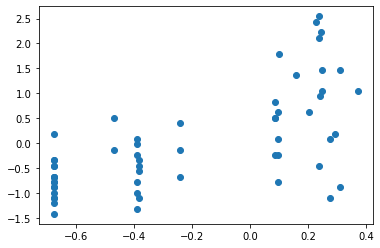

In [ ]:
train = dataset_UK[ : 380]
test = dataset_UK[380 : ]

features = ["positive_rate", "Mortality_Rate"]

train = train[features]
test = test[features]

X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]

X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train)
Y_test = sc.fit_transform(Y_test)

estimators = [
             ("knn", KNeighborsRegressor(n_neighbors = 44)),
              #("xgb", xgb.XGBRegressor(random_state = SEED)),
              ("lasso", Lasso(alpha = 1))

]

reg = StackingRegressor(
    estimators = estimators ,
    final_estimator = KNeighborsRegressor(n_neighbors = 10)
)

reg.fit(X_train, Y_train)
predict = reg.predict(X_test)

r2 = r2_score(Y_test, predict)
mae = mean_absolute_error(Y_test, predict)
mse = mean_squared_error(Y_test, predict)
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print(f"The r2 score is : {r2}")
print(f"The Mean absolute error is : {mae}")
print(f"The Mean squared error score is : {mse}")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")
print("------------------------------------------------")

plt.scatter(predict, Y_test)